In [2]:
import requests # İnternet sitelerinin kaynak kodlarına erişimi sağlar.
from bs4 import BeautifulSoup # Web Scraping

*Bu uygulamada n11 sitesi üzerinden dizüstü bilgisayar kategorisindeki ürünlerin bilgilerini çekeceğim.*

In [4]:
# Kaynağımızın linki
url = "https://www.n11.com/bilgisayar/dizustu-bilgisayar"

# url üzerinden verimizi çekip, kaynak kodlarına erişiyoruz.
html = requests.get(url).content

print(html)

b'\n\n\n\n\n\n\n\n\n\n\n\n<!DOCTYPE html>\n<html lang="tr">\n\n\n<head>\n<meta charset="UTF-8"/>\n\n\n\n<!-- New Google Tag Manager -->\n<script>\n    window[\'dataLayer\'] = window[\'dataLayer\'] || [];\n    window[\'clientTime\'] = window[\'clientTime\'] || new Date().getTime();\n    window[\'gtmId\'] = \'GTM-NCDTBW\';\n</script>\n<!-- End Google Tag Manager -->\n\n    \n\n\n\n\n\n\n\n<!--[if lte IE 9]>\n<link rel="stylesheet" href="https://n11scdn.akamaized.net/static/new-design/static/output/css/n11_1631607532329_ie.css"/>\n<script src=\'https://n11scdn.akamaized.net/static/new-design/static/js/third_party/html5.js\'></script>\n<link rel="stylesheet" href=\'https://n11scdn.akamaized.net/static/new-design/static/style/css/ie.css?v=1\'/>\n<![endif]-->\n\n<!--[if !IE]><!-->\n<link rel="stylesheet" href="https://n11scdn.akamaized.net/static/new-design/static/output/css/n11_1631607532329.css">\n<!--<![endif]-->\n\n\n<!--[if lt IE 9]>\n<script src="https://n11scdn.akamaized.net/static/ne

In [ ]:
# Elde ettiğimiz HTML iskeletini okuyoruz.
soup = BeautifulSoup(html,"html.parser")

# Kaynak kodlarının daha okunaklı olması için "prettify" metodunu kullanıyoruz.
result = soup.prettify()
# print(result)

*Kaynak kodları incelediğimizde her bir ürüne ait bilgilerin `"<li class:"column">"` etiketleri arasında tutulduğunu görüyoruz.*

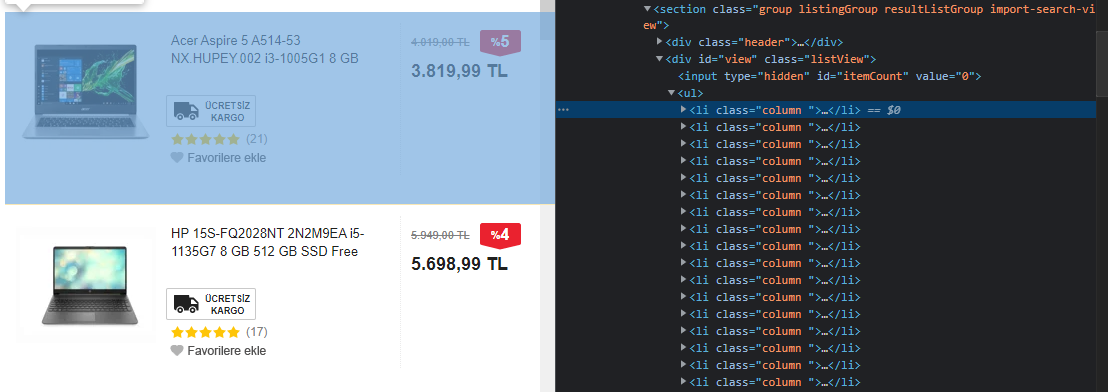

In [6]:
# Ürün bilgilerinin kaynağını bulduktan sonra bunlara kolayca erişebiliriz.

# class:"column" olan <li> etiketlerinden 5 etiketi (ürünü) alalım.
main_list = soup.find_all("li",{"class":"column"},limit=5) 
print(main_list)

[<li class="column ">
<script type="text/javascript">
var customTextOptionMap = {};
</script>
<!-- product_light_cache_view -->
<div class="columnContent " data-ctgid="12" data-position="1" data-searchcount="13247" id="p-493121878">
<div class="pro">
<a class="plink" data-id="493121878" href="https://www.n11.com/urun/acer-aspire-5-a514-53-nxhupey002-i3-1005g1-8-gb-256-gb-ssd-14-free-dos-dizustu-bilgisayar-2012228?magaza=techburada" title='Acer Aspire 5 A514-53 NX.HUPEY.002 i3-1005G1 8 GB 256 GB SSD 14" Free Dos Dizüstü Bilgisayar'>
<img alt='Acer Aspire 5 A514-53 NX.HUPEY.002 i3-1005G1 8 GB 256 GB SSD 14" Free Dos Dizüstü Bilgisayar' class="lazy" data-original="https://n11-image.mncdn.com/a1/140/elektronik/dizustu-bilgisayar/acer-aspire-5-a514-53-nxhupey002-i3-1005g1-8-gb-256-gb-ssd-14-free-dos-dizustu-bilgisayar__1297120027828366.png" height="140" src="https://n11scdn.akamaized.net/static/css/jquery/img/blank.gif" width="140"/>
<h3 class="productName ">
                               

In [12]:
# Her ürün etiketinin içerisinden ürün başlıklarını alalım.

# Her ürün içerisinden <h3 class="productName"> etiketine ulaşıp, text (başlık) bilgisini alıyoruz.
for i in main_list:
  titles = i.find("h3",{"class":"productName"}).text # .text: etiket içerisindeki string
  print(titles)


                                Acer Aspire 5 A514-53 NX.HUPEY.002 i3-1005G1 8 GB 256 GB SSD 14" Free Dos Dizüstü Bilgisayar

                                HP 15S-FQ2028NT 2N2M9EA i5-1135G7 8 GB 512 GB SSD Free Dos FHD Dizüstü Bilgisayar

                                Huawei MateBook D16 Harvey-WAP9D Ryzen 5-4600H 16 GB 512 GB W10H Dizüstü Bilgisayar

                Asus X540UA-DM3498 i3-7100U 4 GB 256 GB SSD 15.6" Free Dos Dizüstü Bilgisayar

                                Monster Tulpar T7 V24.1 i7-11800H 16 GB 500 GB SSD RTX3060 17.3" Free Dos FHD Dizüstü Bilgisayar


In [20]:
# Sırasıyla ürünlerin indirimsiz fiyatlarını listeyelim.

for i in main_list:
  prices = i.find("div",{"class":"proDetail"}).a.text #.get("_etiketin parametresi_")
  print(prices)

4.019,00 TL
5.949,00 TL
8.799,00 TL
3.790,00 TL
14.920,37 TL


In [15]:
# Sırasıyla ürünlerin indirimli fiyatlarını listeleyelim.

for i in main_list:
  disPrices = i.find("input",{"class":"productDisplayPrice"}).get("value") #.get("_etiketin parametresi_")
  print(disPrices)

3,819.99
5,698.99
8,299.99
3,589.99
14,258.99


In [14]:
# Sırasıyla ürün satıcılarını listeleyelim.

for i in main_list:
  sellers = i.find("a",{"class":"sallerInfo"}).get("title") #.get("_etiketin parametresi_")
  print(sellers)


Techburada
NotisTeknoloji
BittiBitiyor
sitebilgisayar
MONSTER


***
***Etiketler arasında dolaşarak istediğimiz verileri çekmeye devam edebiliriz.***